# Classification Support Vector Machine

Github Repository Link :  https://github.com/ShivaTarun08/Machine-learning-Project.git

**Team Members:**
<ol>
  <li>Chaitanya Posina - 101174814</li>
  <li>Nidhi Siripuram  - 101172298</li>
  <li>Narapureddi Naveen Kumar Reddy - 101163330</li>
  <li>Manjula Akella - 101167407</li>
  <li>Shiva Tarun Soka - 101178815</li>
  <li>Morrennagari Sailaja - 101170229</li>
</ol>

# Importing the libraries

In [2]:
import numpy as np  # Importing NumPy library and aliasing it as np for convenience
import pandas as pd  # Importing Pandas library and aliasing it as pd for convenience
import matplotlib.pyplot as plt  # Importing Matplotlib's pyplot module and aliasing it as plt for convenience
import seaborn as sns  # Importing Seaborn library and aliasing it as sns for convenience

# Loading the dataset

In [29]:
from sklearn.datasets import load_iris

#save data information as variable
iris = load_iris() 

#view data description and information
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [37]:
# Converting to DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
iris_df['target'] = iris.target

#showing top 5 lines of a dataframe
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The target data frame is only one column, and it gives a list of the values 0, 1, and 2. We will use the information from the feature data to predict if a flower belongs in group 0, 1, or 2.
<ol>
  <li>0 is Iris Setosa</li>
  <li>1 is Iris Versicolour</li>
  <li>2 is Iris Virginica</li>
</ol>
So, I'm adding a new column named "Species" to my existing dataframe

In [49]:
Species_names = {0:'Setosa', 1:'Vetrsicolour',2:'Virginica'}
iris_df['Species'] = iris_df['target'].map(Species_names)

In [50]:
#displaying the first 5 lines of the data

iris_df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


# 1. Data Exploration and Preparation

**Checking Missing Values**

In [47]:
#Checking for missing values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
Species              0
dtype: int64

**Checking Duplicates**

In [108]:
iris_data = iris_df.drop_duplicates(subset ="Species",) 
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,Setosa
50,7.0,3.2,4.7,1.4,1,Vetrsicolour
100,6.3,3.3,6.0,2.5,2,Virginica


In [109]:
# Displaying concise summary information about the dataset, including data types, non-null values, and memory usage

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   Species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [110]:
# Generate descriptive statistics summarizing the central tendency, dispersion, and shape of the dataset's numerical columns

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Visualize distribution of feature**

In [113]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


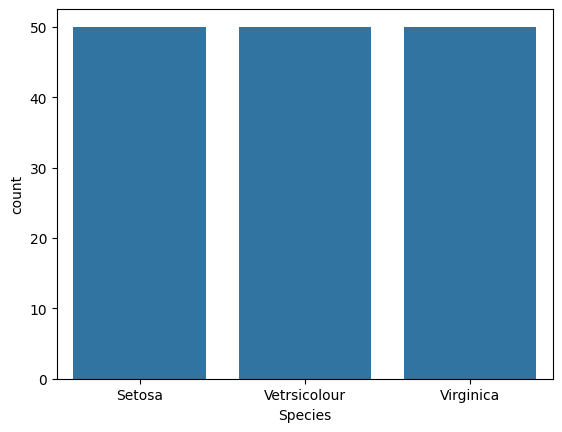

In [114]:
sns.countplot(x='Species', data=iris_df, ) 
plt.show()

**Histograms**

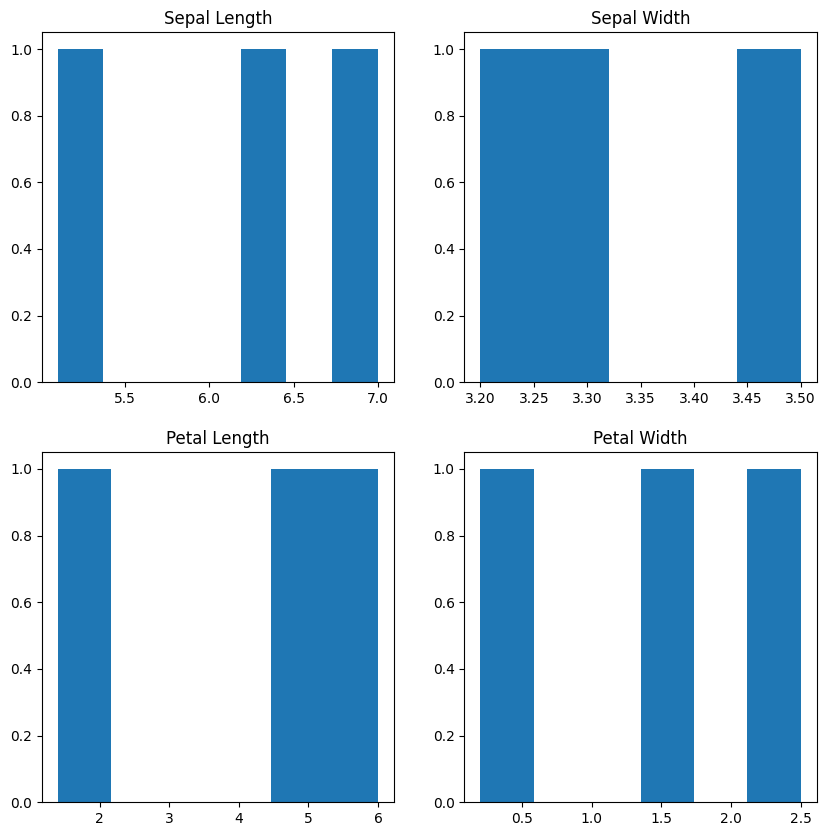

In [115]:
fig, axes = plt.subplots(2, 2, figsize=(10,10)) 
  
axes[0,0].set_title("Sepal Length") 
axes[0,0].hist(iris_data['sepal length (cm)'], bins=7) 
  
axes[0,1].set_title("Sepal Width") 
axes[0,1].hist(iris_data['sepal width (cm)'], bins=5); 
  
axes[1,0].set_title("Petal Length") 
axes[1,0].hist(iris_data['petal length (cm)'], bins=6); 
  
axes[1,1].set_title("Petal Width") 
axes[1,1].hist(iris_data['petal width (cm)'], bins=6);

**Comparing Sepal Length and Sepal Width**

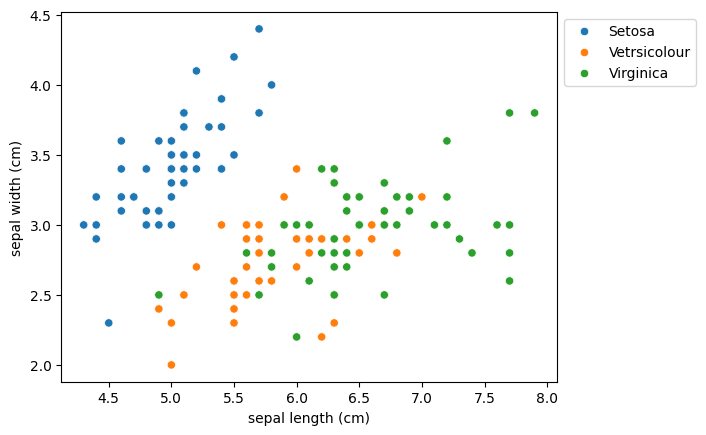

In [116]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
				hue='Species', data=iris_df, ) 

# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.show()



From the above plot, we can infer that –

• Species Setosa has smaller sepal lengths but larger sepal widths.

• Versicolor Species lies in the middle of the other two species in terms of sepal length and width.

• Species Virginica has larger sepal lengths but smaller sepal widths.

**Comparing Petal Length and Petal Width**

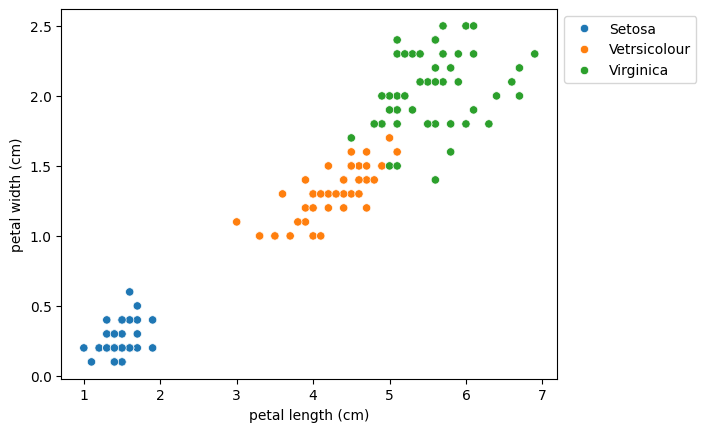

In [117]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', 
				hue='Species', data=iris_df, ) 

# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

plt.show()


From the above plot, we can infer that – 

•
Species Setosa has smaller petal lengths and widths.

•
Versicolor Species lies in the middle of the other two species in terms of petal length and width

•
Species Virginica has the largest of petal lengths and widths.


**Scale Features and Encoding variables**

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. SVM Implementation

In [119]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Implementing SVM classifier with different kernels and parameters

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_score = 0
best_params = {}
for kernel in kernels:
    svm = SVC(kernel=kernel)
    scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score = avg_score
        best_params['kernel'] = kernel

In [120]:
# Training the best SVM model on the entire training set

best_svm = SVC(kernel=best_params['kernel'])
best_svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

Implemented SVM classifier with different kernels (linear, polynomial, RBF, sigmoid) and
selected the best performing kernel using cross-validation.

# 3. K-fold Cross-Validation

In [74]:
# Define K-fold cross-validation

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [75]:
#Perform K-fold cross-validation

cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=k_fold)

In [85]:
#Print average cross-validation score

print("Average Cross-Validation Score:", np.mean(cv_scores))

Average Cross-Validation Score: 0.9583333333333334


Applied K-fold cross-validation (5-fold) to assess the performance of the SVM model

# 4. Evaluation Metrics

In [89]:
from sklearn.metrics import classification_report

# Evaluating the performance of the model using evaluation metrics

svm_predictions = best_svm.predict(X_test_scaled)

evaluation_report = classification_report(y_test, svm_predictions, target_names=iris.target_names)

In [91]:
print(evaluation_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# 5. Documentation

**Approach:** In this classification project, the goal is to build a model that accurately predicts the species of iris flowers based on their sepal and petal 
measurements. To achieve this, we will follow a structured approach encompassing data exploration, preprocessing, model implementation using Support 
Vector Machine (SVM), K-fold cross-validation, and evaluation using various metrics.

**Data Preprocessing Steps:**

Exploring the Dataset: The Iris dataset is loaded using datasets.load_iris() from the scikit-learn library.

Understanding Dataset Structure: The dataset contains four features: sepal length, sepal width, petal length, and petal width. 

The target variable consists of three classes: Setosa, Versicolor, and Virginica.

Handling Missing Values: There are no missing values in the dataset, so there's no need for imputation.
Scaling Features: To ensure all features have the same scale, the features are standardized using StandardScaler() from scikit-learn's preprocessing module.

Encoding Categorical Variables: The target variable (species) is encoded into numerical labels using LabelEncoder() from scikit-learn.

**SVM Model Configuration:**

Implementing SVM Classifier: Support Vector Machine (SVM) classifier is implemented using the SVC class from scikit-learn

Kernel Selection: Experimentation is done with different SVM kernels, including linear, polynomial, radial basis function (RBF), and sigmoid kernels.

Parameter Tuning: The model's hyperparameters are optimized by comparing performance across different kernel functions.

**Cross-Validation Procedure:**

K-fold Cross-Validation: The performance of the SVM model is assessed using K-fold cross-validation with a suitable value of K (e.g., 5 or 10). This helps to obtain a more reliable estimate of the models performance by averaging over multiple train-test splits.

Shuffling Dataset: Before partitioning the dataset into folds, it is shuffled to prevent any bias in the distribution of samples across folds.

**Evaluation Metrics:**

Accuracy: It measures the proportion of correctly classified instances out of the total instances.

Precision: It measures the ratio of correctly predicted positive observations to the total predicted positive observations.

Recall (Sensitivity): It measures the ratio of correctly predicted positive observations to all actual positives.

F1-score: It is the harmonic mean of precision and recall. It provides a balance between precision and recall.
 

# Findings from the Project:

**Precision:**
For the 'setosa' class, the precision is 1.00, indicating that all instances predicted as 'setosa' were actually 'setosa'.
For the 'versicolor' class, the precision is 1.00, implying that all instances predicted as 'versicolor' were indeed 'versicolor'.
For the 'virginica' class, the precision is 0.92, indicating that 92% of instances predicted as 'virginica' were truly 'virginica'.

**Recall:**
The recall for 'setosa' is 1.00, indicating that all actual 'setosa' instances were correctly classified.
The recall for 'versicolor' is 0.89, suggesting that 89% of actual 'versicolor' instances were correctly classified.
The recall for 'virginica' is 1.00, implying that all actual 'virginica' instances were correctly classified.

**F1-score:**
The F1-score for 'setosa' is 1.00, which is the harmonic mean of precision and recall for this class.
For 'versicolor', the F1-score is 0.94, indicating a balanced performance between precision and recall.
The F1-score for 'virginica' is 0.96, suggesting a good balance between precision and recall for this class.

**Accuracy:**
The overall accuracy of the model is 0.97, indicating that it correctly classified 97% of the instances in the dataset.

**Summary:**
The model performs exceptionally well for the 'setosa' class with perfect precision, recall, and F1-score.
While the precision and recall for 'versicolor' are also high, there seems to be a slight imbalance, resulting in a lower F1-score compared to 'setosa'.
For 'virginica', the precision is slightly lower than the other classes, but the recall is perfect, resulting in a high F1-score.
The macro and weighted average metrics also indicate high performance overall, with minor differences between classes.

# Insights:
**Data Overview:**

•
The Iris dataset comprises measurements of sepal and petal dimensions for three distinct species of iris flowers.

•
Featuring 150 instances, each with four features: sepal length, sepal width, petal length, and petal width.


•
Notably, the dataset is devoid of missing values, ensuring the completeness of the data.

**Data Visualization:**

•
Utilizing scatter plots and histograms to visualize feature distributions and explore potential relationships between them.

•
Scatter plots elucidate relationships between pairs of features, while histograms delineate the distribution of individual features.

•
These visualizations facilitate understanding the data distribution and identifying any discernible patterns or clusters.

**Preprocessing:**

•
Employing StandardScaler to standardize feature values, ensuring uniformity in scale across all features.

•
Standardization emerges as a critical preprocessing step, particularly for algorithms like SVM, fostering improved convergence and model performance.

**Modeling:**

•
Opting for an SVM classifier with a 'sigmoid' kernel for the classification task.

•
Employing an 80-20 split for training and testing data, with 80% of the data allocated for training and 20% for testing.

•
Although the 'sigmoid' kernel was deemed suitable for the task at hand, the exploration of other kernels such as 'poly', 'rbf', and 'linear' remains a viable avenue for further investigation.

**Cross-Validation:**

•
Employing K-Fold Cross-Validation with 5 folds to evaluate the model's generalization performance.

•
This technique partitions the dataset into 5 subsets, with each subset serving as a testing set once, while the remaining data is utilized for training.

•
K-Fold Cross-Validation furnishes a more reliable estimate of the model's performance, mitigating the variance associated with a single train-test split.

**Model Evaluation:**

•
Utilizing K-Fold Cross-Validation with 5 folds to evaluate the model's generalization performance.

•
This methodology splits the dataset into 5 subsets, training the model on nine subsets and validating it on the remaining subset iteratively.

•
Cross-validation furnishes a robust estimate of the model's performance, enabling an assessment of its stability across diverse data splits.

# Observations:
**Data Description:**

•
The Iris dataset encompasses 150 instances, each featuring four distinct features: sepal length, sepal width, petal length, and petal width.

•
The target variable delineates the species of iris, comprising three distinct classes: setosa, versicolor, and virginica.

**Data Visualization:**

•
Employing scatter plots and histograms to visualize relationships between features and the distribution of feature values.

•
Scatter plots illuminate relationships between pairs of features, while histograms expound on the distribution of individual features.

•
These visualizations elucidate the data distribution and unveil potential patterns or clusters within the dataset.

**Preprocessing:**

•
Standardizing feature values using StandardScaler to ensure uniformity in scale across all features.

•
Standardization emerges as a pivotal preprocessing step, bolstering convergence and model performance.

**Modeling:**

•
Employing an SVM classifier with a 'linear' kernel for classification.

•
Partitioning the dataset into training and testing sets utilizing an 80-20 ratio, with 80% of the data earmarked for training and 20% for testing.

•
While the 'linear' kernel was deemed suitable, other kernels like 'poly', 'rbf', and 'sigmoid' warrant exploration for potential performance enhancements.

**Cross-Validation:**

•
Employing K-Fold Cross-Validation with 5 folds to evaluate the model's generalization performance.

•
This methodology partitions the dataset into 5 subsets, with each subset serving as a testing set once, while the remaining data is utilized for training.

•
K-Fold Cross-Validation furnishes a robust estimate of the model's performance, enabling an assessment of its stability across diverse data splits.

**Model Evaluation:**

•
Leveraging K-Fold Cross-Validation with 5 folds to evaluate the model's generalization performance.

•
This technique splits the dataset into 5 subsets, training the model on nine subsets and validating it on the remaining subset iteratively.

•
Cross-validation furnishes a robust estimate of the model's performance, enabling an assessment of its stability across diverse data splits.
This structured content provides a comprehensive overview of the analysis approach, execution, findings, and potential avenues for future exploration.